### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

First few rows of the dataset:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN 

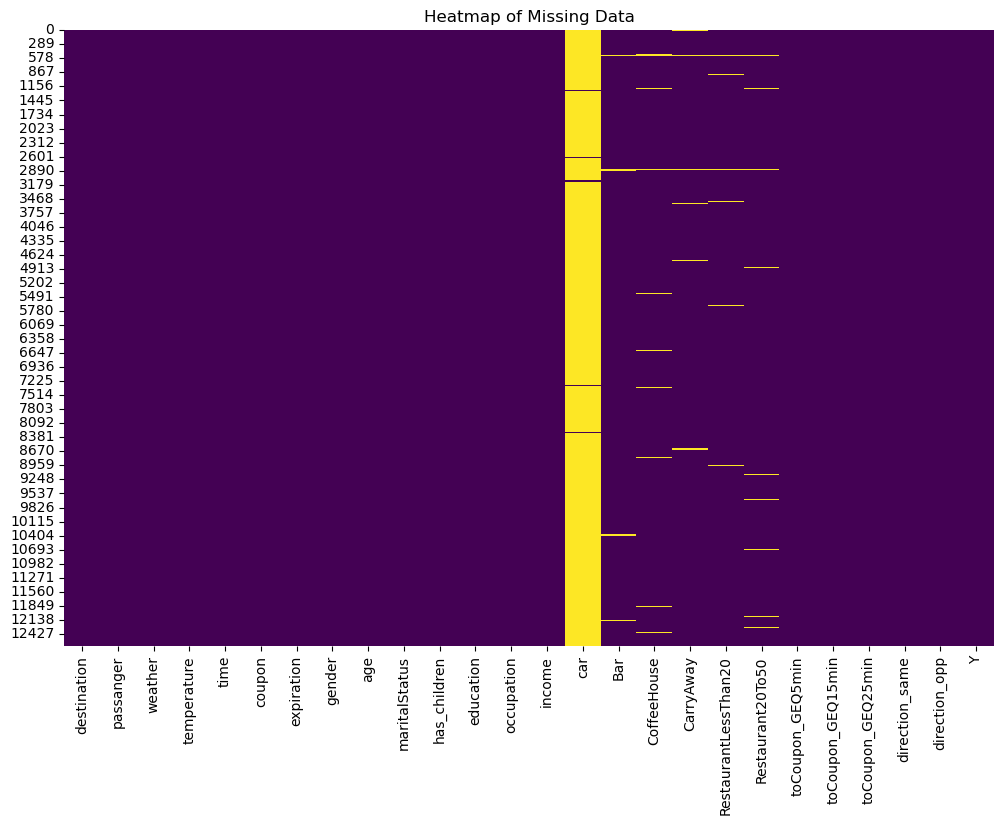

/tmp/ipykernel_83601/187428335.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
/tmp/ipykernel_83601/187428335.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)



Number of duplicate rows:  74


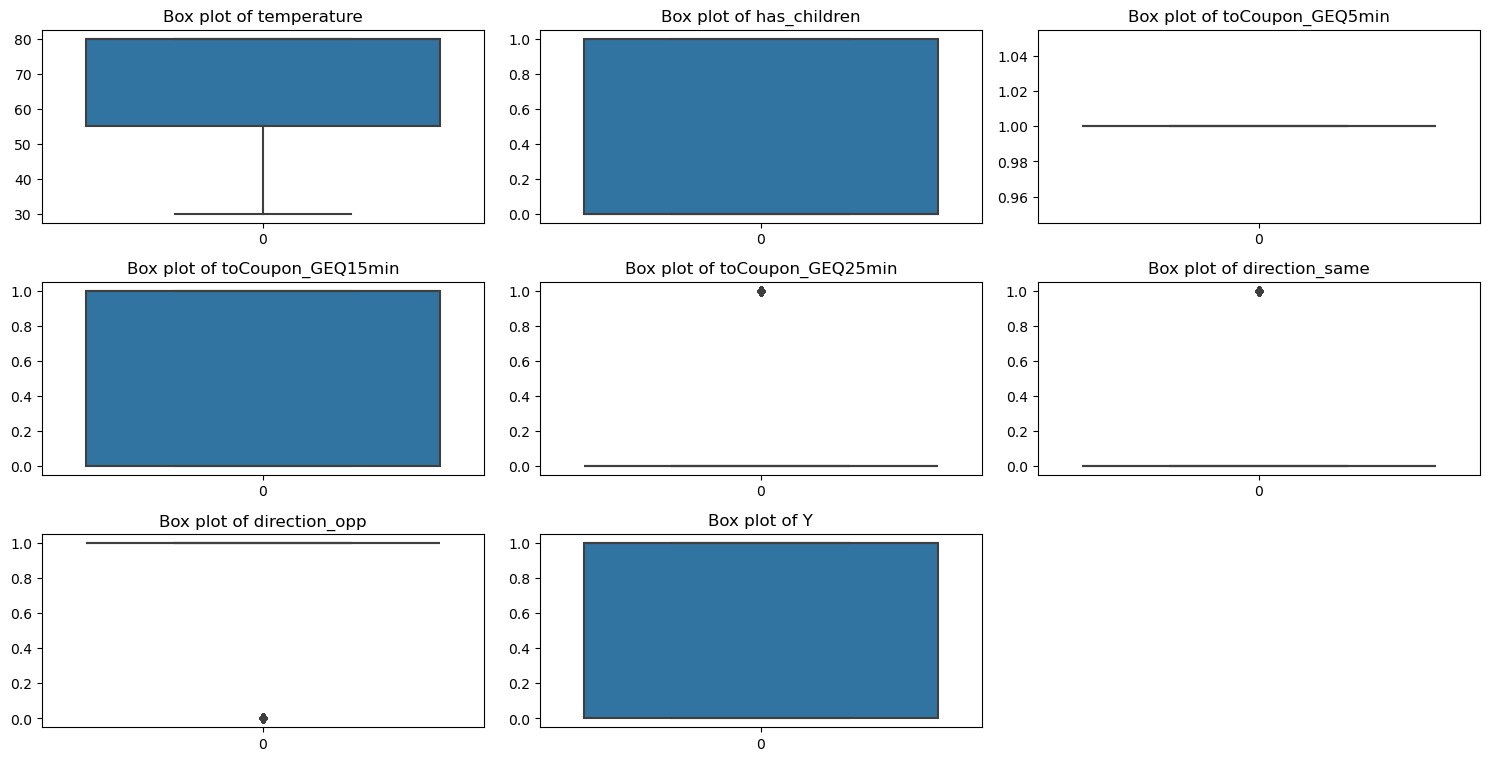


Summary Statistics After Cleaning:
         temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12610.000000  12610.000000           12610.0       12610.000000   
mean      63.267248      0.414512               1.0           0.559794   
std       19.153386      0.492657               0.0           0.496432   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12610.000000    12610.000000   12610.000000  12610.000000  
mean            0.116019        0.215543       0.784457      0.567565  
std             0.320260        0.411215       0.411215      0.495434  
min     

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'data/coupons.csv'  # Update this with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary of missing data
missing_data = df.isnull().sum()
print("\nMissing Data:\n", missing_data)

# Percentage of missing data
missing_data_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Data:\n", missing_data_percentage)

# Data types and unique values
data_types = df.dtypes
unique_values = df.nunique()
print("\nData Types:\n", data_types)
print("\nUnique Values:\n", unique_values)

# Visualize missing data using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Handle missing data (example strategies)
# Drop columns with more than 50% missing data
threshold = 0.5
df_cleaned = df.dropna(thresh=int(threshold * len(df)), axis=1)

# Fill missing values for numerical columns with the median
for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print("\nNumber of duplicate rows: ", duplicates)

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Outlier detection (example using box plots)
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df_cleaned[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

# Basic summary after cleaning
print("\nSummary Statistics After Cleaning:\n", df_cleaned.describe())
print("\nData Information After Cleaning:\n", df_cleaned.info())

# Save cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


3. Decide what to do about your missing data -- drop, replace, other...

In [102]:
import pandas as pd

# Load the data
file_path = 'data/coupons.csv'  # Update this with the actual file path
df = pd.read_csv(file_path)

# Display the percentage of missing data
missing_data_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Data:\n", missing_data_percentage)

# Strategy 1: Drop columns with more than 50% missing data
threshold = 0.5
df_dropped = df.dropna(thresh=int(threshold * len(df)), axis=1)

# Strategy 2: Replace missing values
# Fill missing values for numerical columns with the median
for col in df_dropped.select_dtypes(include=['int64', 'float64']).columns:
    df_dropped[col].fillna(df_dropped[col].median(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in df_dropped.select_dtypes(include=['object']).columns:
    df_dropped[col].fillna(df_dropped[col].mode()[0], inplace=True)

# Verify that there are no more missing values
print("Missing Data After Handling:\n", df_dropped.isnull().sum())

# Save cleaned data to a new CSV file
df_dropped.to_csv('cleaned_dataset.csv', index=False)


Percentage of Missing Data:
 destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64
Missing Data After Handling:
 destination             0
passanger       

/tmp/ipykernel_83601/2848574483.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[col].fillna(df_dropped[col].median(), inplace=True)
/tmp/ipykernel_83601/2848574483.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[col].fillna(df_dropped[col].mode()[0], inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [103]:


# Total number of observations
total_observations = len(df)

# Number of accepted coupons
accepted_coupons = df['Y'].sum()

# Proportion of accepted coupons
proportion_accepted = accepted_coupons / total_observations

print(f"Proportion of accepted coupons: {proportion_accepted:.2f}")


Proportion of accepted coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

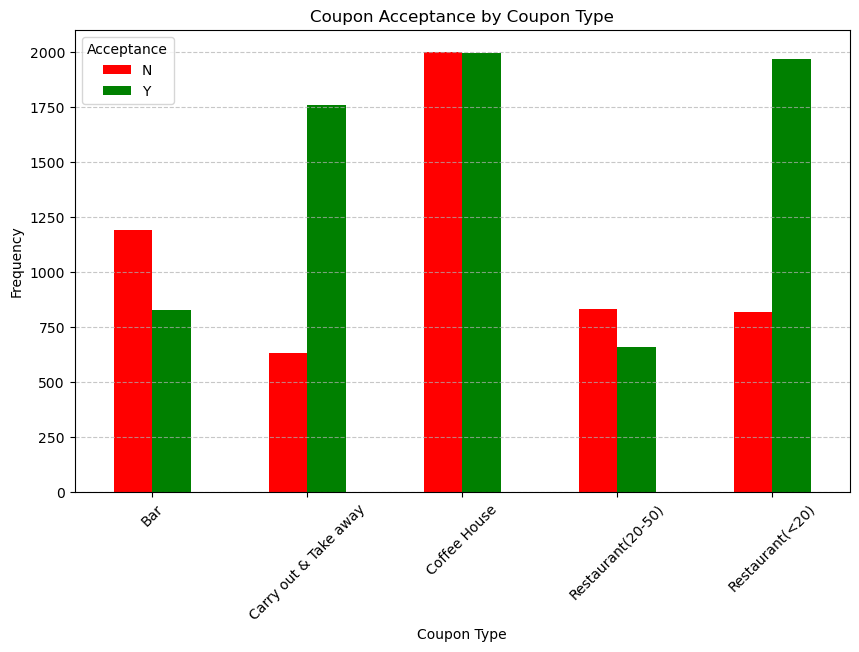

In [104]:

# Grouping and counting the occurrences
acceptance_counts = df.groupby(['coupon', 'Y']).size().unstack(fill_value=0)

# Plotting the grouped bar plot
acceptance_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Acceptance', labels=['N', 'Y'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       1~3                  4~8              1~3   
1        never       1~3                  4~8           

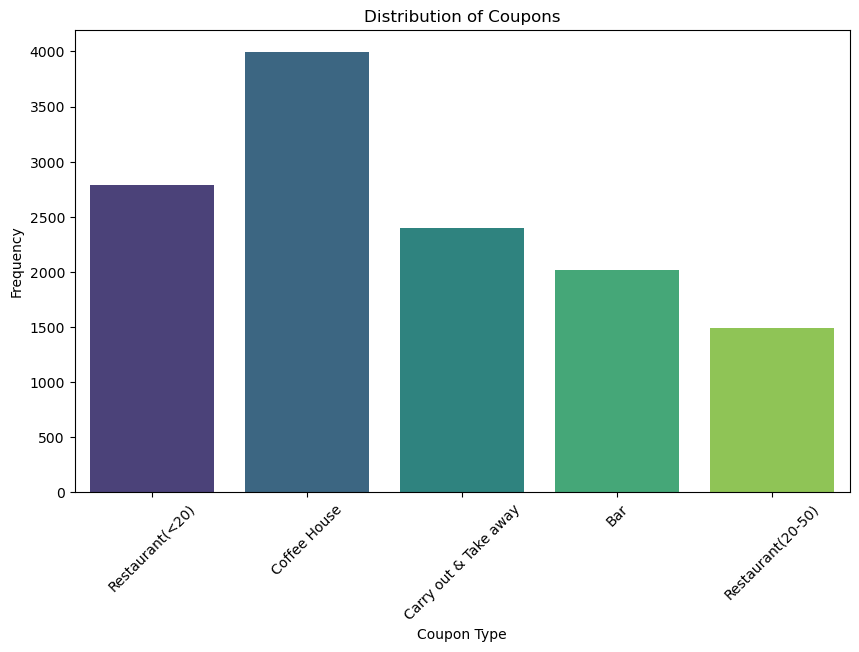

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Display the first few rows to understand the structure
print(df_dropped.head())

# Bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dropped, x='coupon', palette='viridis')

# Add title and labels
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


6. Use a histogram to visualize the temperature column.

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       1~3                  4~8              1~3   
1        never       1~3                  4~8           

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


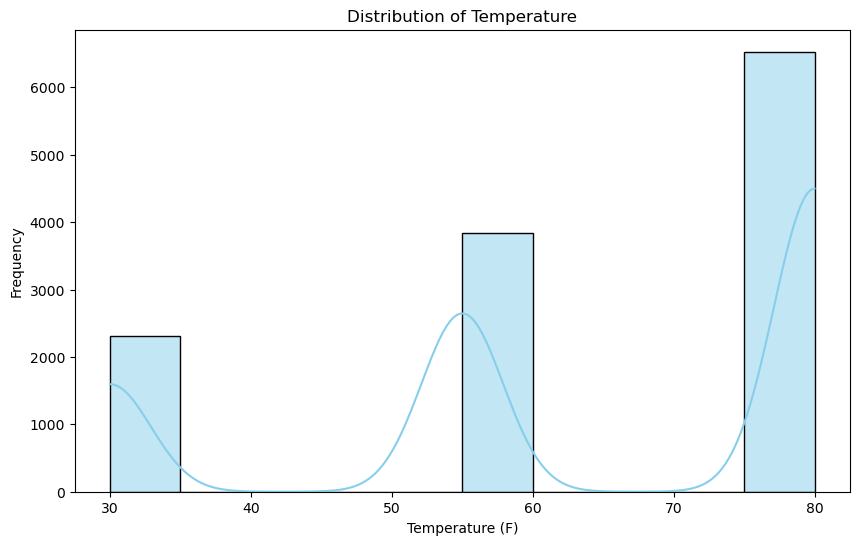

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows to understand the structure
print(df_dropped.head())

# Histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(df_dropped['temperature'], bins=10, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       1~3                  4~8              1~3   
1        never       1~3                  4~8           

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


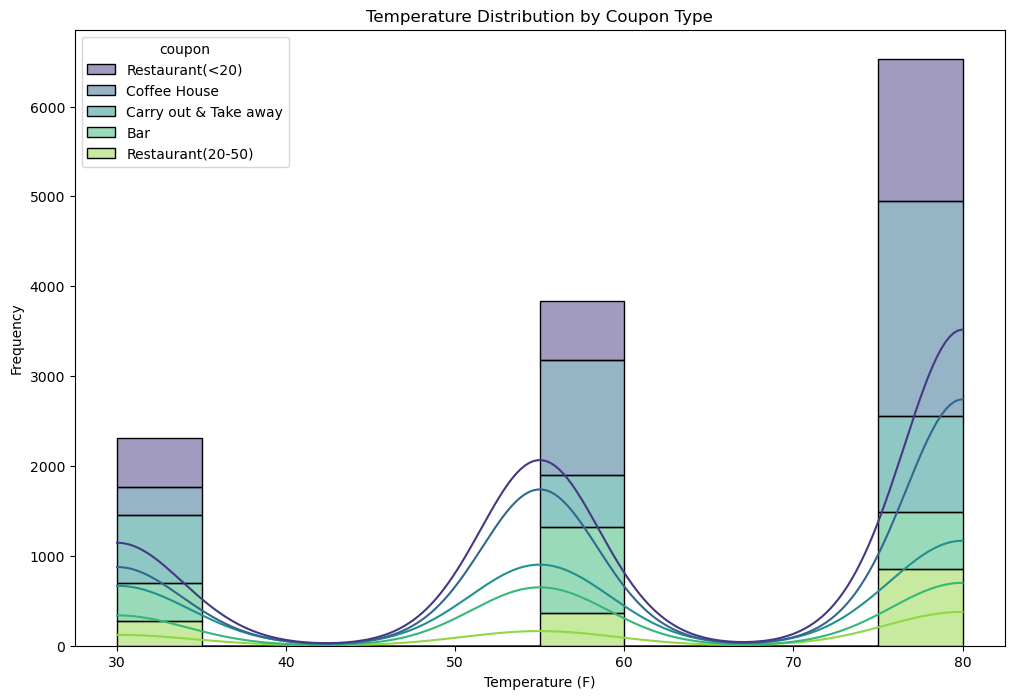

In [107]:
print(df_dropped.head())

# Histogram for the 'temperature' column vs 'coupon'
plt.figure(figsize=(12, 8))
sns.histplot(data=df_dropped, x='temperature', hue='coupon', multiple='stack', palette='viridis', bins=10, kde=True)

# Add title and labels
plt.title('Temperature Distribution by Coupon Type')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [108]:
import pandas as pd


# Display the first few rows to understand the structure
print(df_dropped.head())

# Create a new DataFrame for bar coupons
df_bar_coupons = df_dropped[df_dropped['coupon'] == 'bar']

# Display the first few rows of the new DataFrame
print("\nFirst few rows of the DataFrame for bar coupons:")
print(df_bar_coupons.head())


       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       1~3                  4~8              1~3   
1        never       1~3                  4~8           

2. What proportion of bar coupons were accepted?


In [109]:
import pandas as pd



bar_coupons = df_dropped[df_dropped['coupon'] == 'Bar']

# Count the total number of bar coupons
total_bar_coupons = len(bar_coupons)

# Count the number of accepted bar coupons
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1].shape[0]

# Calculate the proportion of accepted bar coupons
proportion_accepted = accepted_bar_coupons / total_bar_coupons

print(f"Proportion of accepted bar coupons: {proportion_accepted:.2f}")


Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


11152
6268
0.562051649928264
Acceptance rate for those who went to a bar 3 or fewer times a month: 0.56
Acceptance rate for those who went to a bar more than 3 times a month: 0.62


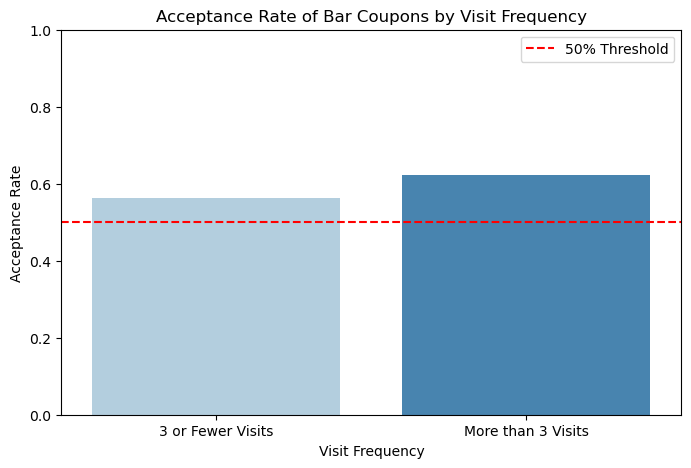

In [110]:
group1 = df[df['Bar'].isin(['never', '1~3', 'less1'])]
group2 = df[df['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for group 1
total_group1 = len(group1)
print(total_group1)
accepted_group1 = group1[group1['Y'] == 1].shape[0]
print(accepted_group1)
acceptance_rate_group1 = accepted_group1 / total_group1
print(acceptance_rate_group1)
# Calculate the acceptance rate for group 2
total_group2 = len(group2)
accepted_group2 = group2[group2['Y'] == 1].shape[0]
acceptance_rate_group2 = accepted_group2 / total_group2

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_group1:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_group2:.2f}")
rates = {
    'Group': ['3 or Fewer Visits', 'More than 3 Visits'],
    'Acceptance Rate': [acceptance_rate_group1, acceptance_rate_group2]
}
rates_df = pd.DataFrame(rates)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Acceptance Rate', data=rates_df, palette='Blues')
plt.title('Acceptance Rate of Bar Coupons by Visit Frequency')
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Acceptance Rate')
plt.xlabel('Visit Frequency')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Bar    object
age    object
dtype: object
['never' 'less1' '1~3' 'gt8' '4~8']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 77.69%
Acceptance rate for all other drivers: 38.66%


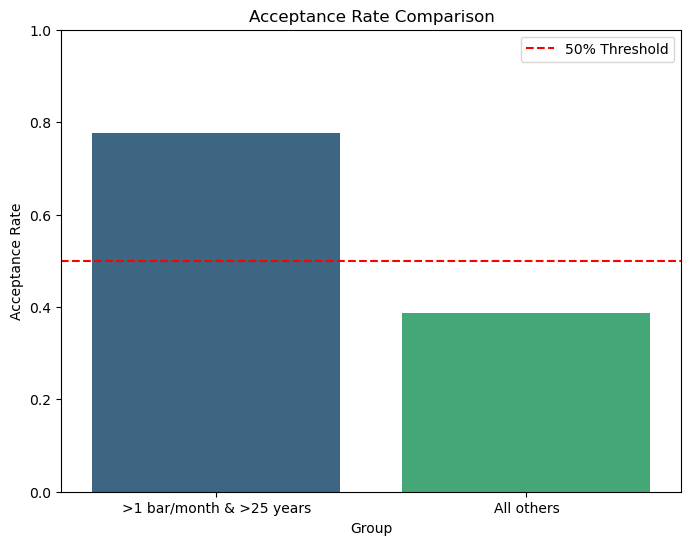

In [111]:
# Filter for Bar coupons
bar_coupons_data = df_dropped[df_dropped['coupon'] == 'Bar'].copy()

# Check data types
print(bar_coupons_data[['Bar', 'age']].dtypes)

# Print unique values
print(bar_coupons_data['Bar'].unique())
print(bar_coupons_data['age'].unique())

# Define replacement dictionary
replacement_dict = {
    'less1': 0,
    '1~3': 1,
    '4~8': 4,
    'gt8': 8,
}

# Replace values
bar_coupons_data['Bar'] = bar_coupons_data['Bar'].replace(replacement_dict)

# Convert to numeric, coercing errors to NaN
bar_coupons_data['Bar'] = pd.to_numeric(bar_coupons_data['Bar'], errors='coerce')
bar_coupons_data['age'] = pd.to_numeric(bar_coupons_data['age'], errors='coerce')

# Handle NaN values
bar_coupons_data['Bar'].fillna(-1, inplace=True)
bar_coupons_data['age'].fillna(-1, inplace=True)

# Create subsets based on conditions
subset_1 = bar_coupons_data[(bar_coupons_data['Bar'] > 1) & (bar_coupons_data['age'] > 25)]
subset_2 = bar_coupons_data[~((bar_coupons_data['Bar'] > 1) & (bar_coupons_data['age'] > 25))]

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_subset_2:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Group': ['>1 bar/month & >25 years', 'All others'],
    'Acceptance Rate': [acceptance_rate_subset_1, acceptance_rate_subset_2]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette="viridis", dodge=False)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [113]:
bar_coupons_data = df_dropped[df_dropped['coupon'] == 'Bar'].copy()

# Check unique values
print("Unique values in Bar:", bar_coupons_data['Bar'].unique())
print("Unique values in passanger:", bar_coupons_data['passanger'].unique())
print("Unique values in occupation:", bar_coupons_data['occupation'].unique())
print(bar_coupons_data[['Bar', 'passanger', 'occupation', 'Y']].isna().sum())

# Create subsets
subset_1 = bar_coupons_data[
    (bar_coupons_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_data['passanger'] != 'Kid(s)') & 
    (~bar_coupons_data['occupation'].isin(['Farming Fishing & Forestry']))
]

subset_2 = bar_coupons_data[
    ~(
        (bar_coupons_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
        (bar_coupons_data['passanger'] != 'Kid(s)') & 
        (~bar_coupons_data['occupation'].isin(['Farming Fishing & Forestry']))
    )
]

# Print the number of rows in each subset
print(f"Number of rows in subset_1: {len(subset_1)}")
print(f"Number of rows in subset_2: {len(subset_2)}")

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()

print(f"Acceptance rate for drivers in subset_1: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_subset_2:.2%}")

Unique values in Bar: ['never' 'less1' '1~3' 'gt8' '4~8']
Unique values in passanger: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Unique values in occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
Bar           0
passanger     0
occupation    0
Y             0
dtype: int64
Number of rows in subset_1: 551
Number of rows in subset_2: 1466
Acceptance rate for drivers in s

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.31%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 62.85%
Acceptance rate for drivers who go to cheap restaurants < 4 times a month and income is less than 50K: 60.03%


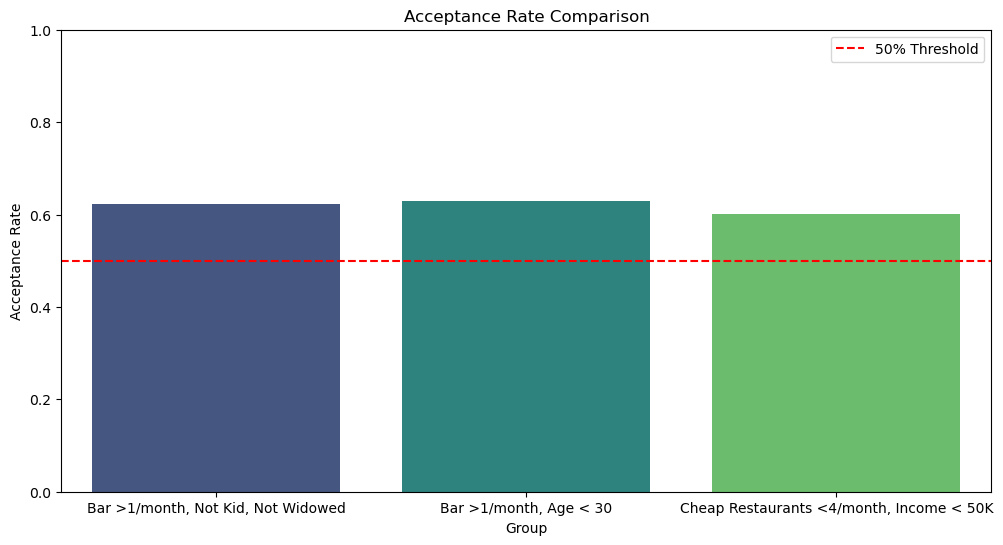

In [142]:
import pandas as pd

# Load the data
file_path = 'data/coupons.csv'  # Update this with the actual file path
df_dropped = pd.read_csv(file_path)





condition_1 = ((df_dropped['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_dropped['passanger'] != 'Kid(s)') & (df_dropped['maritalStatus'] != 'Widowed'))

condition_2 = ((df_dropped['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_dropped['age'] < '30'))

condition_3 = (
    (df_dropped['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df_dropped['income'] < '$50000')
)
# Create subsets
subset_1 = df_dropped[condition_1]
subset_2 = df_dropped[condition_2]
subset_3 = df_dropped[condition_3]

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()
acceptance_rate_subset_3 = subset_3['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_subset_2:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants < 4 times a month and income is less than 50K: {acceptance_rate_subset_3:.2%}")

# Create a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Group': [
        'Bar >1/month, Not Kid, Not Widowed', 
        'Bar >1/month, Age < 30', 
        'Cheap Restaurants <4/month, Income < 50K'
    ],
    'Acceptance Rate': [
        acceptance_rate_subset_1, 
        acceptance_rate_subset_2, 
        acceptance_rate_subset_3
    ]
})

# Create a bar plot to visualize the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette="viridis")
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Hypotheses about Drivers Accepting Bar Coupons
Higher Bar Usage:

Hypothesis: Drivers who frequently visit bars (evidenced by a Bar score greater than 1) are more likely to accept coupons. This suggests that they value promotional offers that encourage their regular social activities.
Age Factor:

Hypothesis: Younger drivers (under 30) exhibit a higher acceptance rate for bar coupons. This may indicate that younger individuals are more responsive to discounts and promotions, aligning with trends in spending behavior among younger demographics.
Marital Status Influence:

Hypothesis: Drivers who are not widowed are more likely to accept coupons. This could reflect differences in lifestyle choices, where single or partnered individuals may be more engaged in social outings.
Income Level:

Hypothesis: Drivers with lower income levels (e.g., less than $50,000) are more inclined to accept bar coupons. This suggests that budget-conscious individuals may actively seek out discounts to stretch their spending.
Dining Behavior:

Hypothesis: Drivers who frequently dine at inexpensive restaurants (less than four in the category) are likely to accept bar coupons. This behavior might indicate a preference for value and cost-effectiveness in their overall dining experiences.
Family Status:

Hypothesis: Drivers without children (not categorized as "Kid(s)") are more likely to accept bar coupons, as they may have more disposable income and time to socialize without family commitments.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [149]:
# Filter the DataFrame to contain only restaurant coupon data
restaurantlt20_coupons_data = df_dropped[df_dropped['coupon'] == 'Restaurant(<20)']
# Count the number of rows
row_count = restaurantlt20_coupons_data.shape[0]

# Print or use row_count as needed
print(f"Number of rows where coupon is 'Restaurant(<20)': {row_count}")

# Filter the DataFrame to contain only restaurant coupon data
restaurantlt20To50_coupons_data = df_dropped[df_dropped['coupon'] == 'Restaurant(20-50)']
# Count the number of rows
row_count = restaurantlt20To50_coupons_data.shape[0]

# Print or use row_count as needed
print(f"Number of rows where coupon is 'Restaurant(20-50)': {row_count}")


Number of rows where coupon is 'Restaurant(<20)': 2786
Number of rows where coupon is 'Restaurant(20-50)': 1492


In [152]:
restaurantlt20_coupons_data = df_dropped[df_dropped['coupon'] == 'Restaurant(<20)']
restaurantlt20To50_coupons_data = df_dropped[df_dropped['coupon'] == 'Restaurant(20-50)']

acceptance_rate_lt20 = restaurantlt20_coupons_data['Y'].mean()
acceptance_rate_20_to_50 = restaurantlt20To50_coupons_data['Y'].mean()

print(f"Acceptance rate for Restaurant(<20) coupons: {acceptance_rate_lt20:.2%}")
print(f"Acceptance rate for Restaurant(20-50) coupons: {acceptance_rate_20_to_50:.2%}")

Acceptance rate for Restaurant(<20) coupons: 70.71%
Acceptance rate for Restaurant(20-50) coupons: 44.10%


In [153]:
accepted_lt20_stats = restaurantlt20_coupons_data.describe(include='all')
accepted_20_to_50_stats = restaurantlt20To50_coupons_data.describe(include='all')

print("Statistics for Restaurant(<20) Coupons:\n", accepted_lt20_stats)
print("Statistics for Restaurant(20-50) Coupons:\n", accepted_20_to_50_stats)

Statistics for Restaurant(<20) Coupons:
             destination passanger weather  temperature  time           coupon  \
count              2786      2786    2786  2786.000000  2786             2786   
unique                3         4       3          NaN     5                1   
top     No Urgent Place     Alone   Sunny          NaN   6PM  Restaurant(<20)   
freq               1716      1435    2240          NaN   748             2786   
mean                NaN       NaN     NaN    64.215721   NaN              NaN   
std                 NaN       NaN     NaN    19.785759   NaN              NaN   
min                 NaN       NaN     NaN    30.000000   NaN              NaN   
25%                 NaN       NaN     NaN    55.000000   NaN              NaN   
50%                 NaN       NaN     NaN    80.000000   NaN              NaN   
75%                 NaN       NaN     NaN    80.000000   NaN              NaN   
max                 NaN       NaN     NaN    80.000000   NaN        

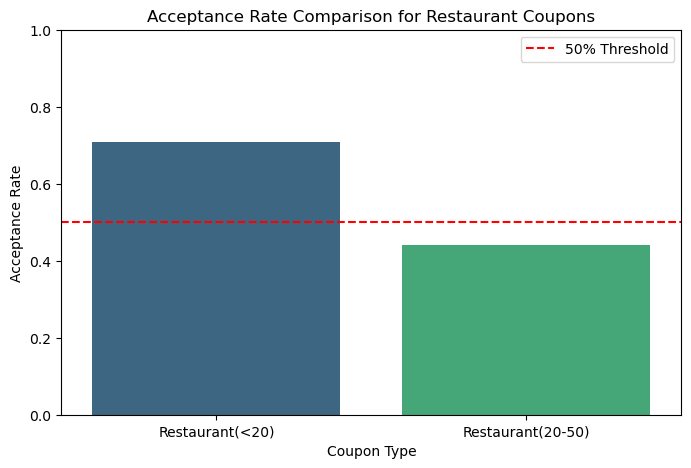

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Coupon Type': ['Restaurant(<20)', 'Restaurant(20-50)'],
    'Acceptance Rate': [acceptance_rate_lt20, acceptance_rate_20_to_50]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Coupon Type', y='Acceptance Rate', data=acceptance_rates, palette="viridis")
plt.title('Acceptance Rate Comparison for Restaurant Coupons')
plt.ylabel('Acceptance Rate')
plt.xlabel('Coupon Type')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sella/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


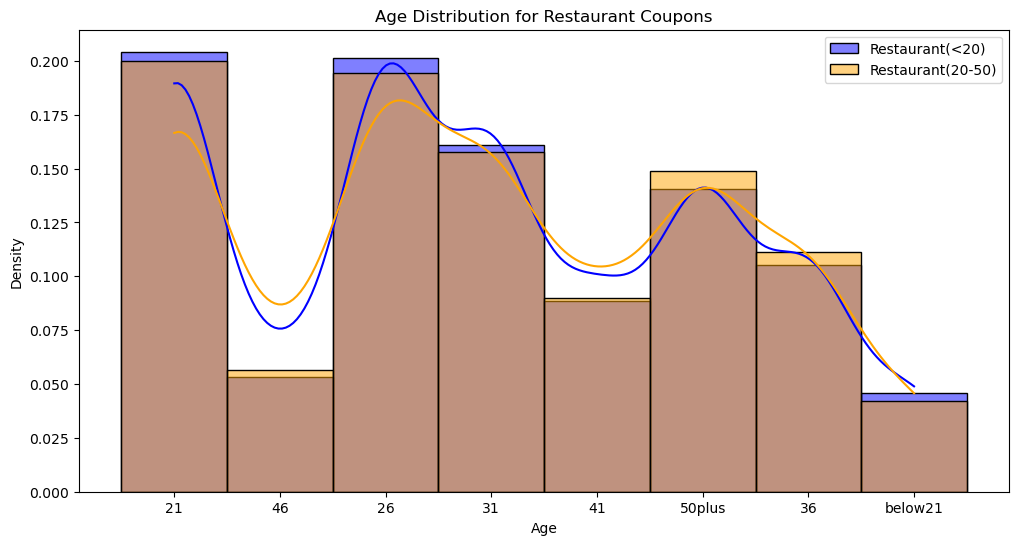

In [156]:
# Example: Analyze age distribution
plt.figure(figsize=(12, 6))
sns.histplot(restaurantlt20_coupons_data['age'], color='blue', label='Restaurant(<20)', kde=True, stat='density')
sns.histplot(restaurantlt20To50_coupons_data['age'], color='orange', label='Restaurant(20-50)', kde=True, stat='density')
plt.title('Age Distribution for Restaurant Coupons')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [159]:
marital_status_groups = restaurantlt20_coupons_data['maritalStatus'].unique()
acceptance_rates_marital = {}

for status in marital_status_groups:
    acceptance_rate = restaurantlt20_coupons_data[restaurantlt20_coupons_data['maritalStatus'] == status]['Y'].mean()
    acceptance_rates_marital[status] = acceptance_rate

print("Acceptance Rates by Marital Status:")
for status, rate in acceptance_rates_marital.items():
    print(f"{status}: {rate:.2%}")

Acceptance Rates by Marital Status:
Unmarried partner: 72.57%
Single: 72.99%
Married partner: 68.99%
Divorced: 63.33%
Widowed: 55.17%


In [160]:
# Create subsets for different occupations
occupation_groups = restaurantlt20_coupons_data['occupation'].unique()
acceptance_rates_occupation = {}

for occupation in occupation_groups:
    acceptance_rate = restaurantlt20_coupons_data[restaurantlt20_coupons_data['occupation'] == occupation]['Y'].mean()
    acceptance_rates_occupation[occupation] = acceptance_rate

print("Acceptance Rates by Occupation:")
for occupation, rate in acceptance_rates_occupation.items():
    print(f"{occupation}: {rate:.2%}")


Acceptance Rates by Occupation:
Unemployed: 66.67%
Architecture & Engineering: 79.49%
Student: 71.30%
Education&Training&Library: 69.23%
Healthcare Support: 73.58%
Healthcare Practitioners & Technical: 68.63%
Sales & Related: 79.83%
Management: 73.26%
Arts Design Entertainment Sports & Media: 64.71%
Computer & Mathematical: 70.67%
Life Physical Social Science: 83.33%
Personal Care & Service: 58.97%
Community & Social Services: 70.00%
Office & Administrative Support: 75.74%
Construction & Extraction: 88.57%
Legal: 59.18%
Retired: 58.56%
Installation Maintenance & Repair: 70.37%
Transportation & Material Moving: 73.91%
Business & Financial: 67.72%
Protective Service: 89.47%
Food Preparation & Serving Related: 71.01%
Production Occupations: 76.00%
Building & Grounds Cleaning & Maintenance: 40.00%
Farming Fishing & Forestry: 57.14%


In [162]:
# Create subsets for different income brackets
income_groups = restaurantlt20_coupons_data['income'].unique()
acceptance_rates_income = {}

for income in income_groups:
    acceptance_rate = restaurantlt20_coupons_data[restaurantlt20_coupons_data['income'] == income]['Y'].mean()
    acceptance_rates_income[income] = acceptance_rate

print("Acceptance Rates by Income:")
for income, rate in acceptance_rates_income.items():
    print(f"{income}: {rate:.2%}")

Acceptance Rates by Income:
$37500 - $49999: 68.18%
$62500 - $74999: 69.68%
$12500 - $24999: 68.50%
$75000 - $87499: 66.15%
$50000 - $62499: 78.25%
$25000 - $37499: 75.34%
$100000 or More: 71.77%
$87500 - $99999: 57.79%
Less than $12500: 72.41%


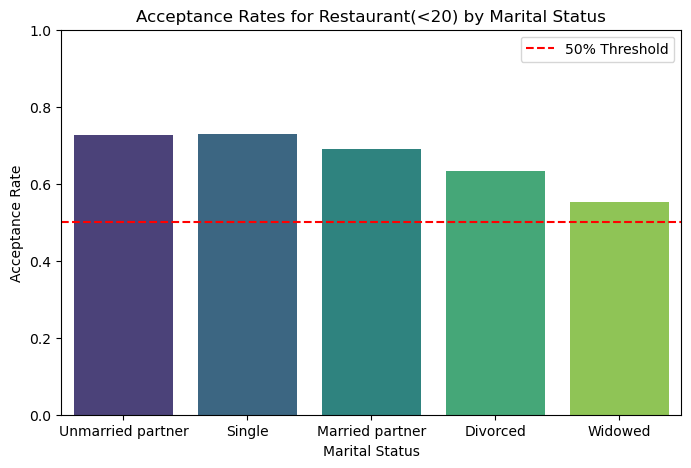

In [163]:
acceptance_rates_df = pd.DataFrame(list(acceptance_rates_marital.items()), columns=['Marital Status', 'Acceptance Rate'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Marital Status', y='Acceptance Rate', data=acceptance_rates_df, palette="viridis")
plt.title('Acceptance Rates for Restaurant(<20) by Marital Status')
plt.ylabel('Acceptance Rate')
plt.xlabel('Marital Status')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

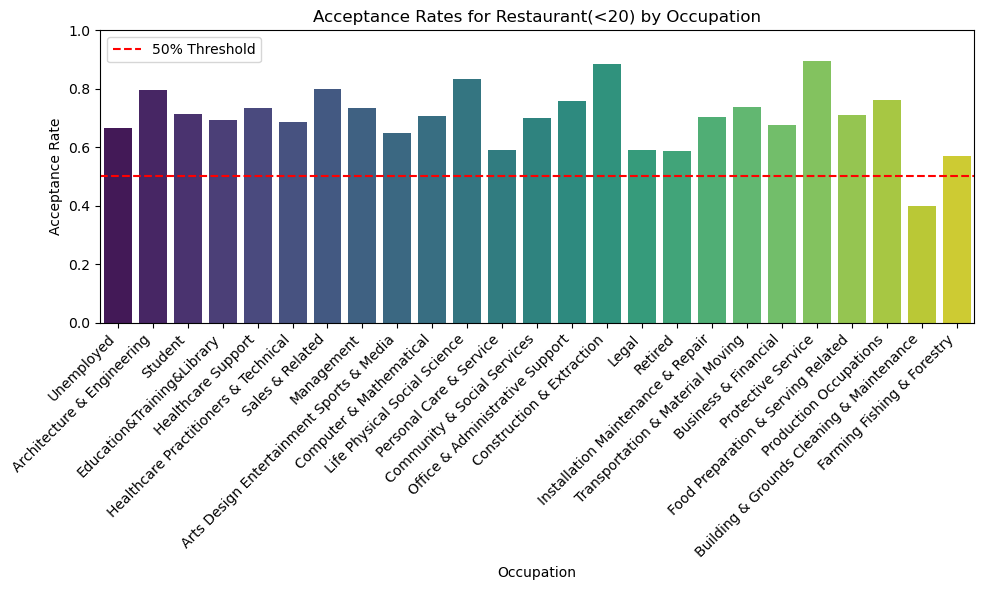

In [165]:
acceptance_rates_df = pd.DataFrame(list(acceptance_rates_occupation.items()), columns=['Occupation', 'Acceptance Rate'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Acceptance Rate', data=acceptance_rates_df, palette="viridis")
plt.title('Acceptance Rates for Restaurant(<20) by Occupation')
plt.ylabel('Acceptance Rate')
plt.xlabel('Occupation')
plt.ylim(0, 1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

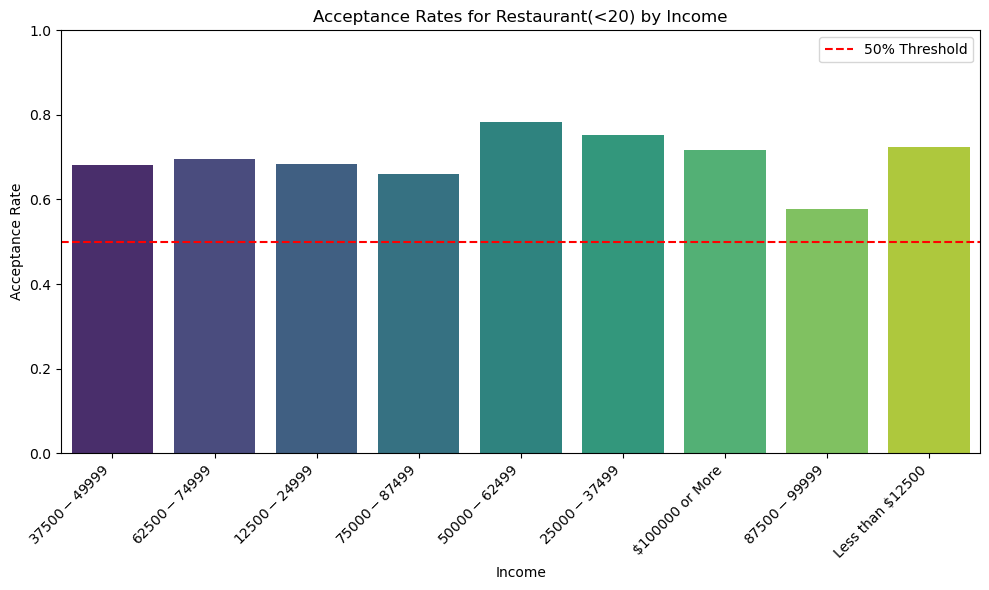

In [166]:

acceptance_rates_df = pd.DataFrame(list(acceptance_rates_income.items()), columns=['Income', 'Acceptance Rate'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Income', y='Acceptance Rate', data=acceptance_rates_df, palette="viridis")
plt.title('Acceptance Rates for Restaurant(<20) by Income')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income')
plt.ylim(0, 1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

Acceptance Rate for Bar: 41.00%
Acceptance Rate for Restaurant(<20): 70.71%
Acceptance Rate for Restaurant(20-50): 44.10%


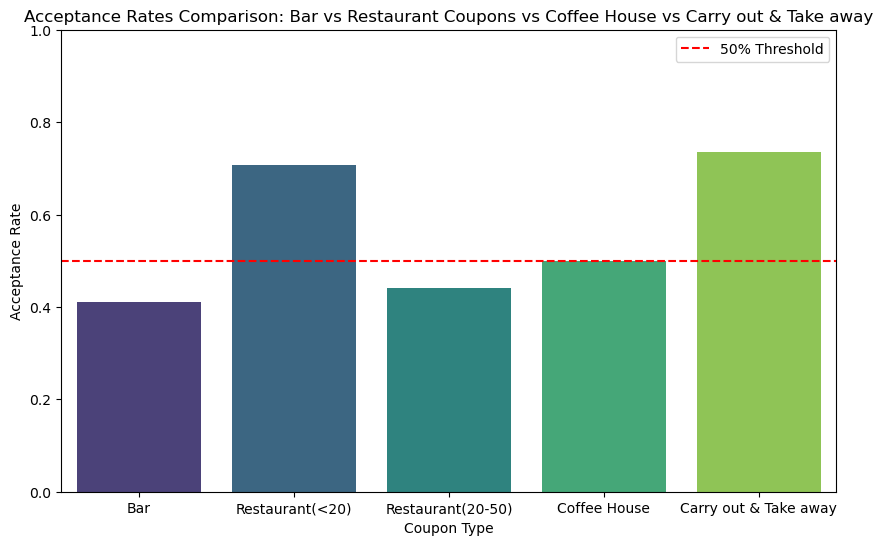

In [170]:
acceptance_rate_bar = df_dropped[df_dropped['coupon'] == 'Bar']['Y'].mean()
acceptance_rate_restaurant_lt20 = df_dropped[df_dropped['coupon'] == 'Restaurant(<20)']['Y'].mean()
acceptance_rate_restaurant_20_50 = df_dropped[df_dropped['coupon'] == 'Restaurant(20-50)']['Y'].mean()
acceptance_rate_coffee_house = df_dropped[df_dropped['coupon'] == 'Coffee House']['Y'].mean()
acceptance_rate_carry_out = df_dropped[df_dropped['coupon'] == 'Carry out & Take away']['Y'].mean()

# Print acceptance rates
print(f"Acceptance Rate for Bar: {acceptance_rate_bar:.2%}")
print(f"Acceptance Rate for Restaurant(<20): {acceptance_rate_restaurant_lt20:.2%}")
print(f"Acceptance Rate for Restaurant(20-50): {acceptance_rate_restaurant_20_50:.2%}")
# Create a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Coupon Type': [
        'Bar', 
        'Restaurant(<20)', 
        'Restaurant(20-50)',
        'Coffee House',
        'Carry out & Take away'
    ],
    'Acceptance Rate': [
        acceptance_rate_bar, 
        acceptance_rate_restaurant_lt20, 
        acceptance_rate_restaurant_20_50,
        acceptance_rate_coffee_house,
        acceptance_rate_carry_out
    ]
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coupon Type', y='Acceptance Rate', data=acceptance_rates, palette="viridis")
plt.title('Acceptance Rates Comparison: Bar vs Restaurant Coupons vs Coffee House vs Carry out & Take away')
plt.ylabel('Acceptance Rate')
plt.xlabel('Coupon Type')
plt.ylim(0, 1)

plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

Acceptance rate for 'Carry out & Take away': 73.55%


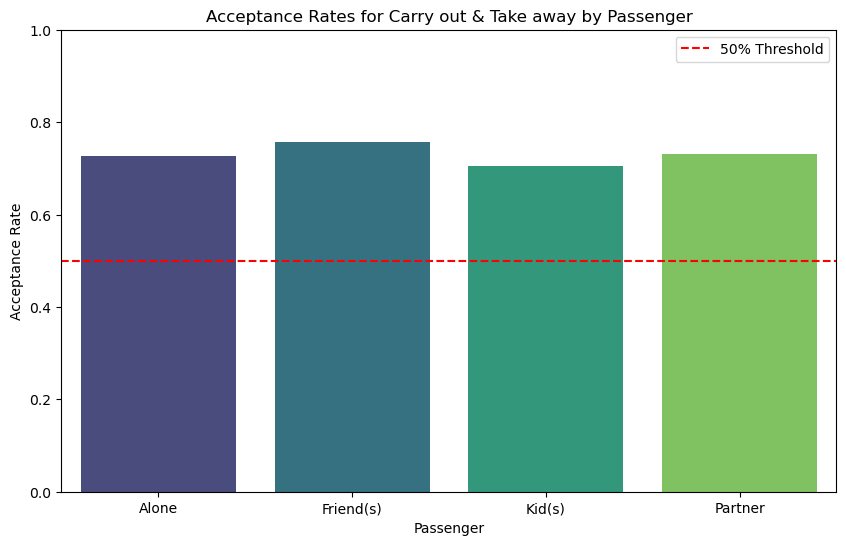

In [171]:
carry_out_data = df_dropped[df_dropped['coupon'] == 'Carry out & Take away']
acceptance_rate_carry_out = carry_out_data['Y'].mean()
print(f"Acceptance rate for 'Carry out & Take away': {acceptance_rate_carry_out:.2%}")
# Calculate acceptance rates by passenger occupation
acceptance_rates_occupation = carry_out_data.groupby('passanger')['Y'].mean()

# Convert to DataFrame for easier plotting
acceptance_rates_df = acceptance_rates_occupation.reset_index()
acceptance_rates_df.columns = ['Passenger', 'Acceptance Rate']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Passenger', y='Acceptance Rate', data=acceptance_rates_df, palette="viridis")
plt.title('Acceptance Rates for Carry out & Take away by Passenger')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()


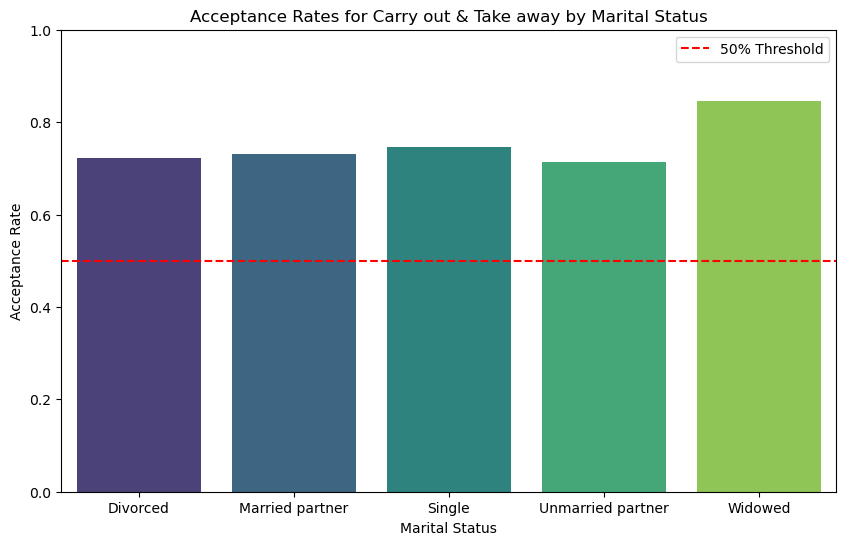

In [173]:
acceptance_rates_marital = carry_out_data.groupby('maritalStatus')['Y'].mean()
acceptance_rates_marital_df = acceptance_rates_marital.reset_index()
acceptance_rates_marital_df.columns = ['Marital Status', 'Acceptance Rate']
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Acceptance Rate', data=acceptance_rates_marital_df, palette="viridis")
plt.title('Acceptance Rates for Carry out & Take away by Marital Status')
plt.ylabel('Acceptance Rate')
plt.xlabel('Marital Status')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

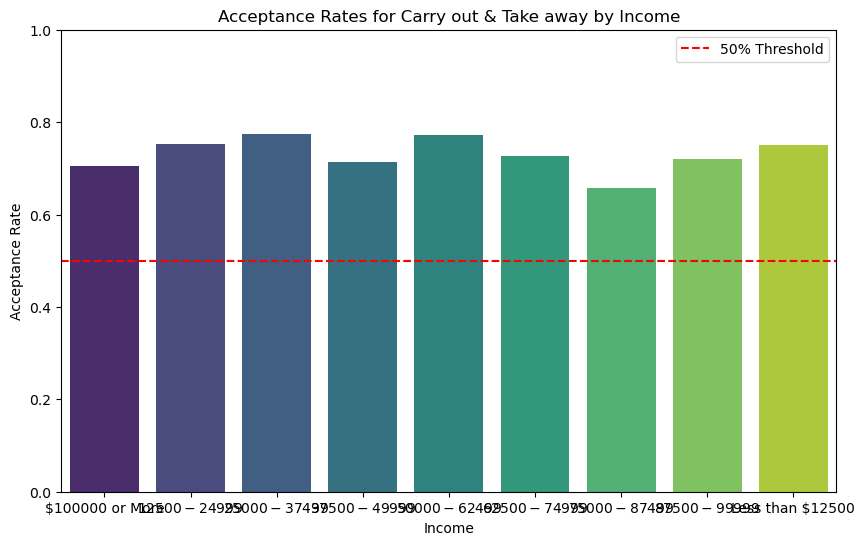

In [174]:
acceptance_rates_income = carry_out_data.groupby('income')['Y'].mean()
acceptance_rates_income_df = acceptance_rates_income.reset_index()
acceptance_rates_income_df.columns = ['Income', 'Acceptance Rate']
plt.figure(figsize=(10, 6))
sns.barplot(x='Income', y='Acceptance Rate', data=acceptance_rates_income_df, palette="viridis")
plt.title('Acceptance Rates for Carry out & Take away by Income')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

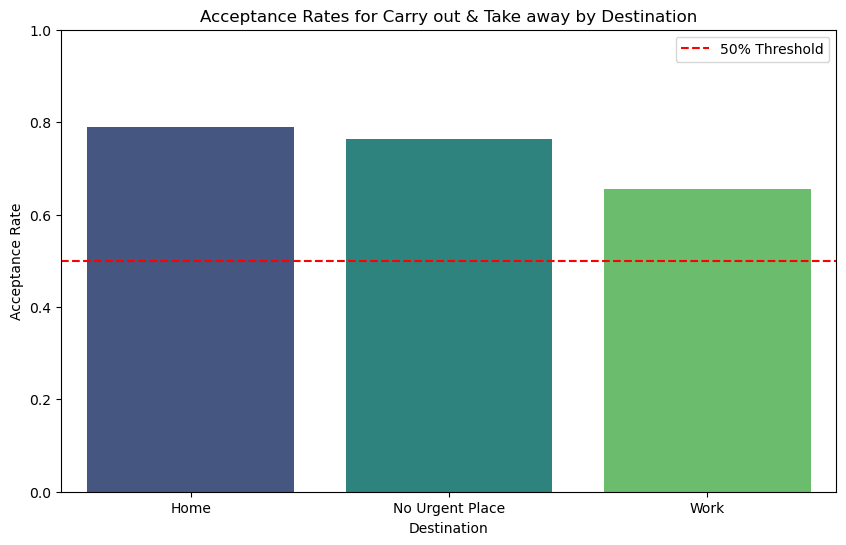

In [175]:
acceptance_rates_destination = carry_out_data.groupby('destination')['Y'].mean()
acceptance_rates_destination_df = acceptance_rates_destination.reset_index()
acceptance_rates_destination_df.columns = ['Destination', 'Acceptance Rate']
plt.figure(figsize=(10, 6))
sns.barplot(x='Destination', y='Acceptance Rate', data=acceptance_rates_destination_df, palette="viridis")
plt.title('Acceptance Rates for Carry out & Take away by Destination')
plt.ylabel('Acceptance Rate')
plt.xlabel('Destination')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

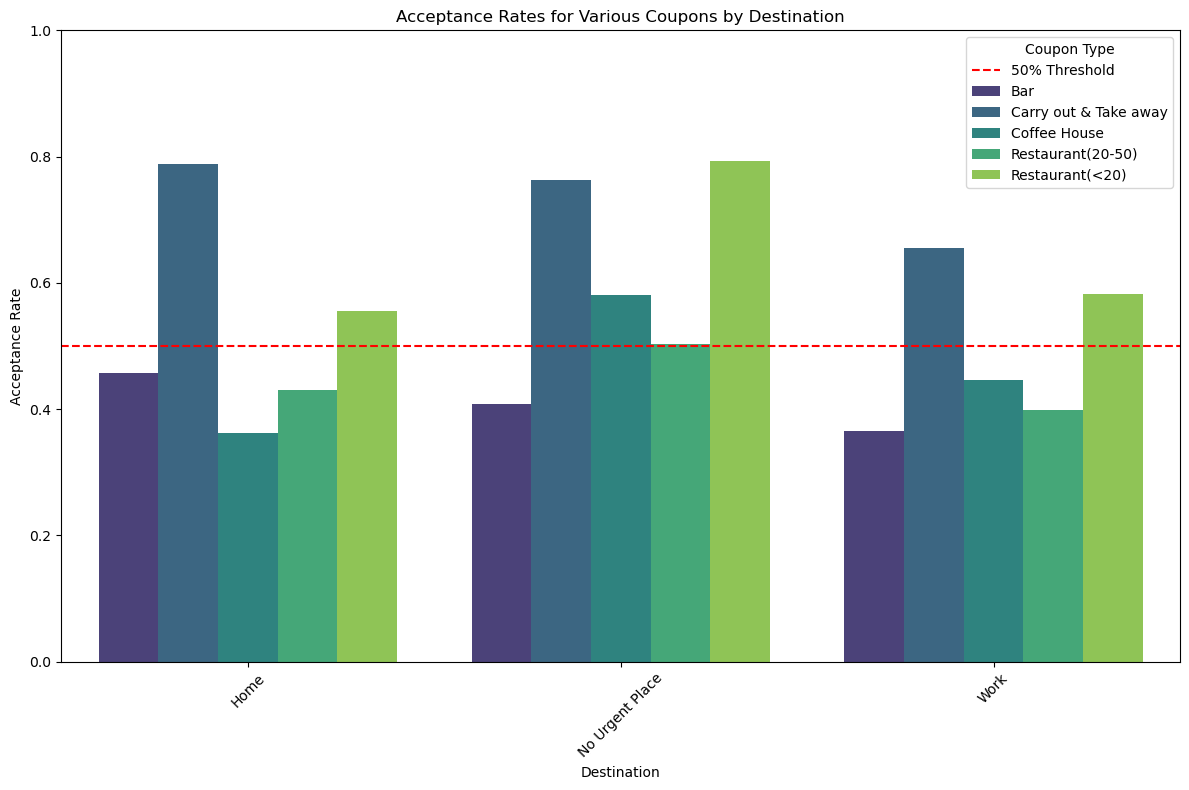

In [179]:
# Calculate acceptance rates for each coupon type by destination
acceptance_rates = df_dropped.groupby(['coupon', 'destination'])['Y'].mean().unstack()

# Convert to DataFrame for better readability
acceptance_rates_df = acceptance_rates.reset_index()


acceptance_rates_melted = acceptance_rates_df.melt(id_vars='coupon', var_name='destination', value_name='Acceptance Rate')

plt.figure(figsize=(12, 8))
sns.barplot(x='destination', y='Acceptance Rate', hue='coupon', data=acceptance_rates_melted, palette="viridis")
plt.title('Acceptance Rates for Various Coupons by Destination')
plt.ylabel('Acceptance Rate')
plt.xlabel('Destination')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend(title='Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

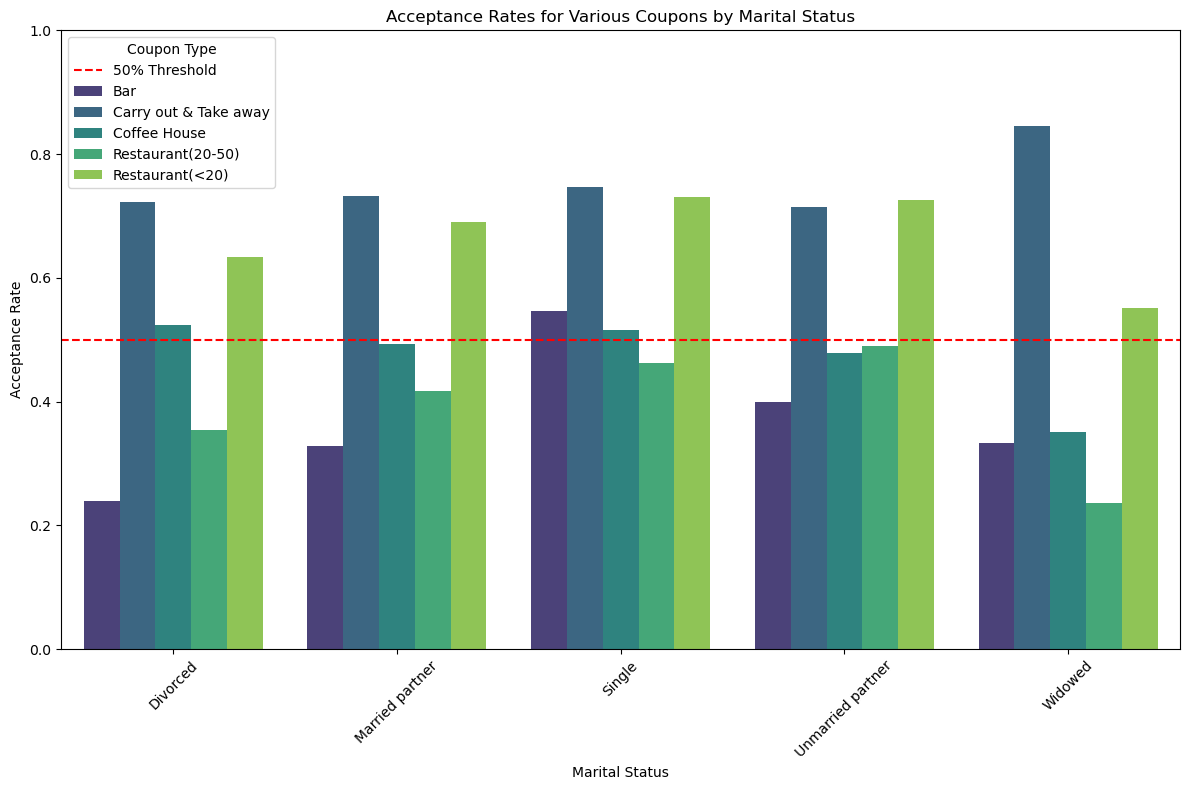

In [182]:
# Calculate acceptance rates for each coupon type by marital status
acceptance_rates = df_dropped.groupby(['coupon', 'maritalStatus'])['Y'].mean().unstack()

# Convert to DataFrame for better readability
acceptance_rates_df = acceptance_rates.reset_index()


# Melt the DataFrame for better visualization with seaborn
acceptance_rates_melted = acceptance_rates_df.melt(id_vars='coupon', var_name='maritalStatus', value_name='Acceptance Rate')

plt.figure(figsize=(12, 8))
sns.barplot(x='maritalStatus', y='Acceptance Rate', hue='coupon', data=acceptance_rates_melted, palette="viridis")
plt.title('Acceptance Rates for Various Coupons by Marital Status')
plt.ylabel('Acceptance Rate')
plt.xlabel('Marital Status')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend(title='Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

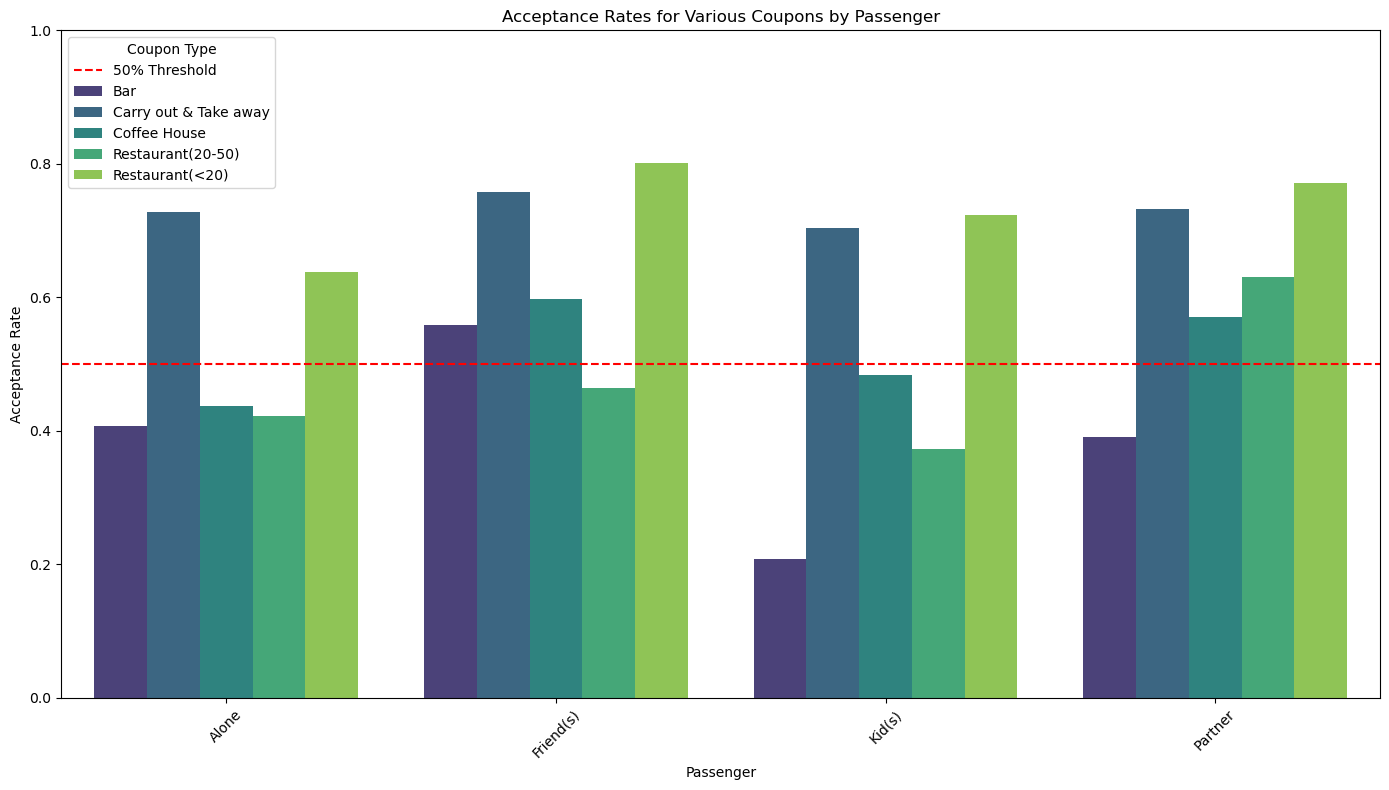

In [184]:
acceptance_rates = df_dropped.groupby(['coupon', 'passanger'])['Y'].mean().unstack()

# Convert to DataFrame for better readability
acceptance_rates_df = acceptance_rates.reset_index()
# Melt the DataFrame for better visualization with seaborn
acceptance_rates_melted = acceptance_rates_df.melt(id_vars='coupon', var_name='passanger', value_name='Acceptance Rate')

plt.figure(figsize=(14, 8))
sns.barplot(x='passanger', y='Acceptance Rate', hue='coupon', data=acceptance_rates_melted, palette="viridis")
plt.title('Acceptance Rates for Various Coupons by Passenger')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend(title='Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [185]:
acceptance_rates = df_dropped.groupby(['coupon', 'income'])['Y'].mean().unstack()

# Convert to DataFrame for better readability
acceptance_rates_df = acceptance_rates.reset_index()
# Melt the DataFrame for better visualization with seaborn
acceptance_rates_melted = acceptance_rates_df.melt(id_vars='coupon', var_name='income', value_name='Acceptance Rate')

plt.figure(figsize=(14, 8))
sns.barplot(x='passanger', y='Acceptance Rate', hue='coupon', data=acceptance_rates_melted, palette="viridis")
plt.title('Acceptance Rates for Various Coupons by Income')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.legend(title='Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'passanger'

<Figure size 1400x800 with 0 Axes>

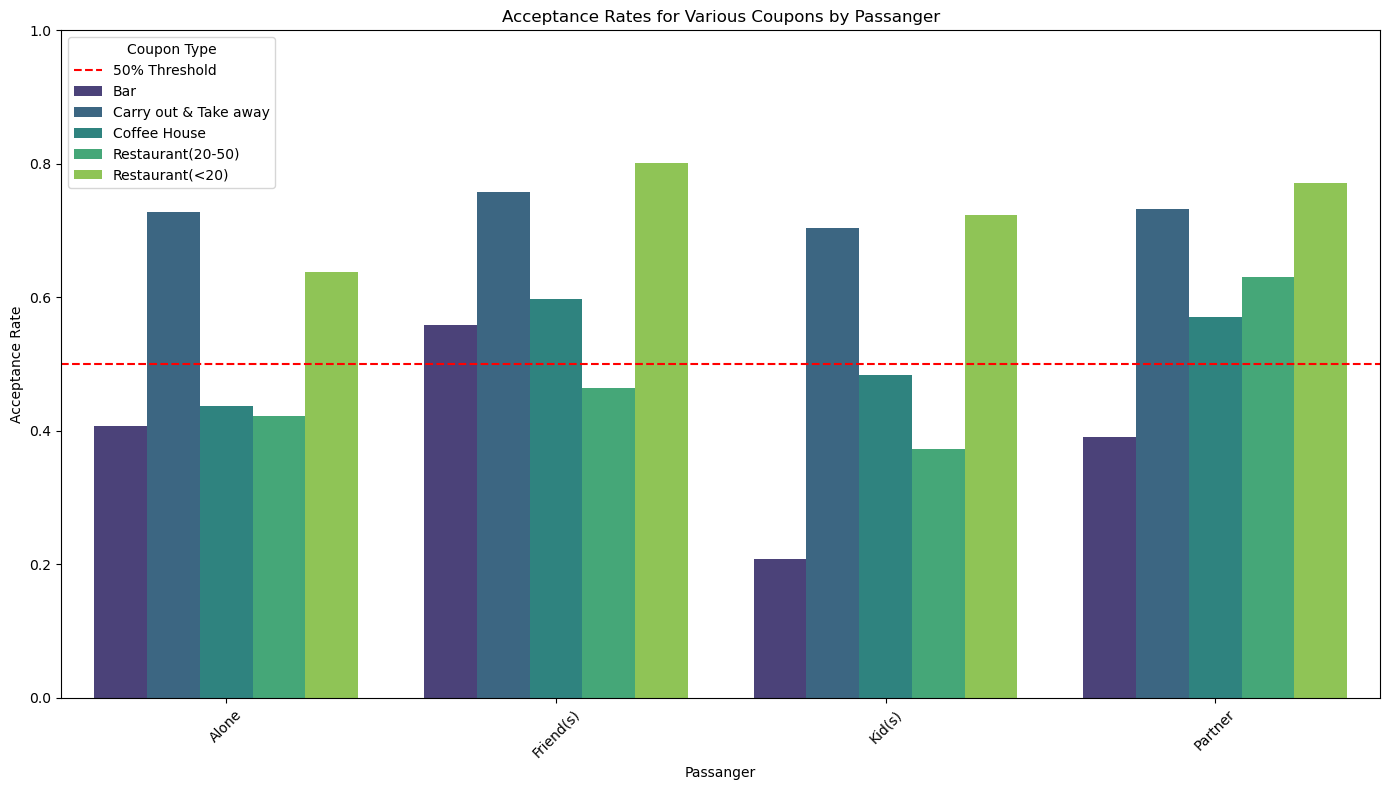

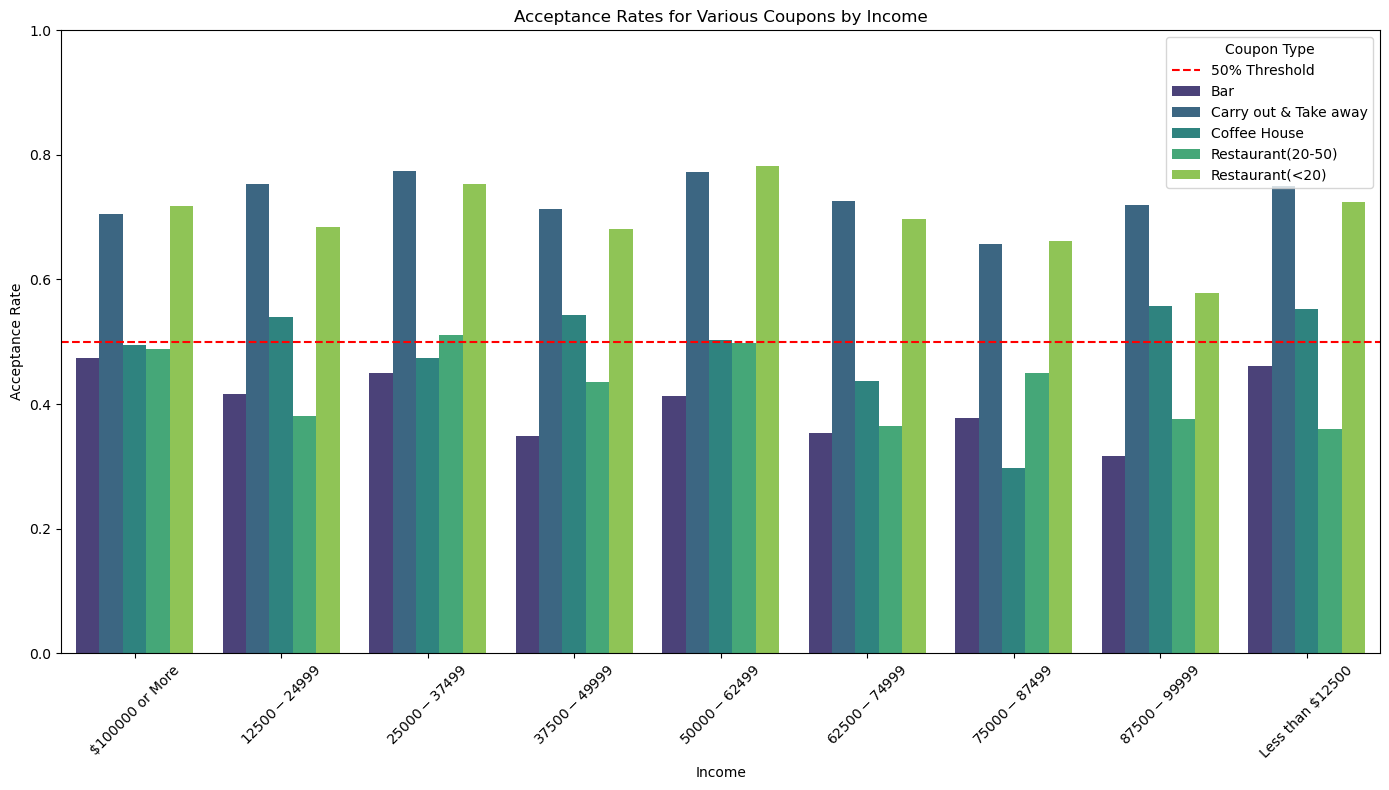

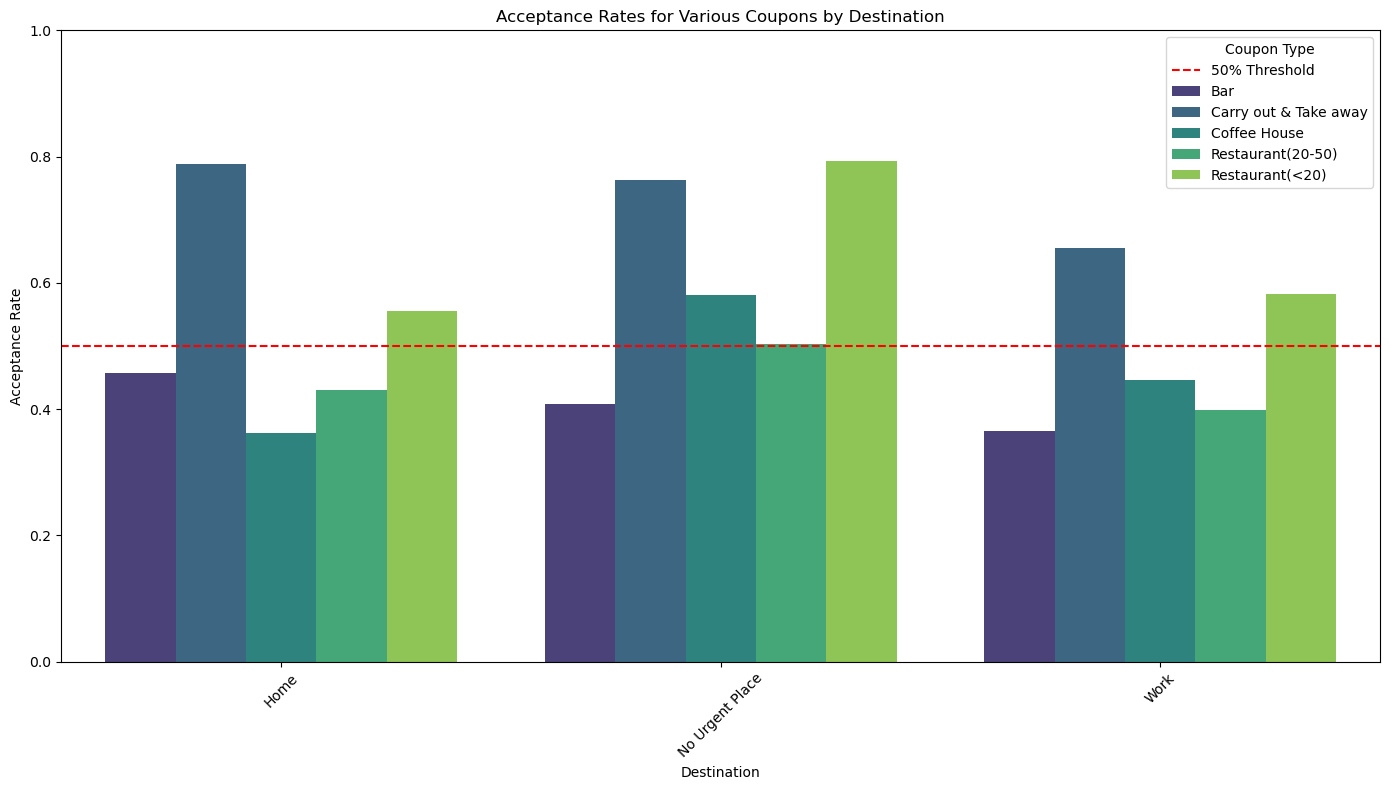

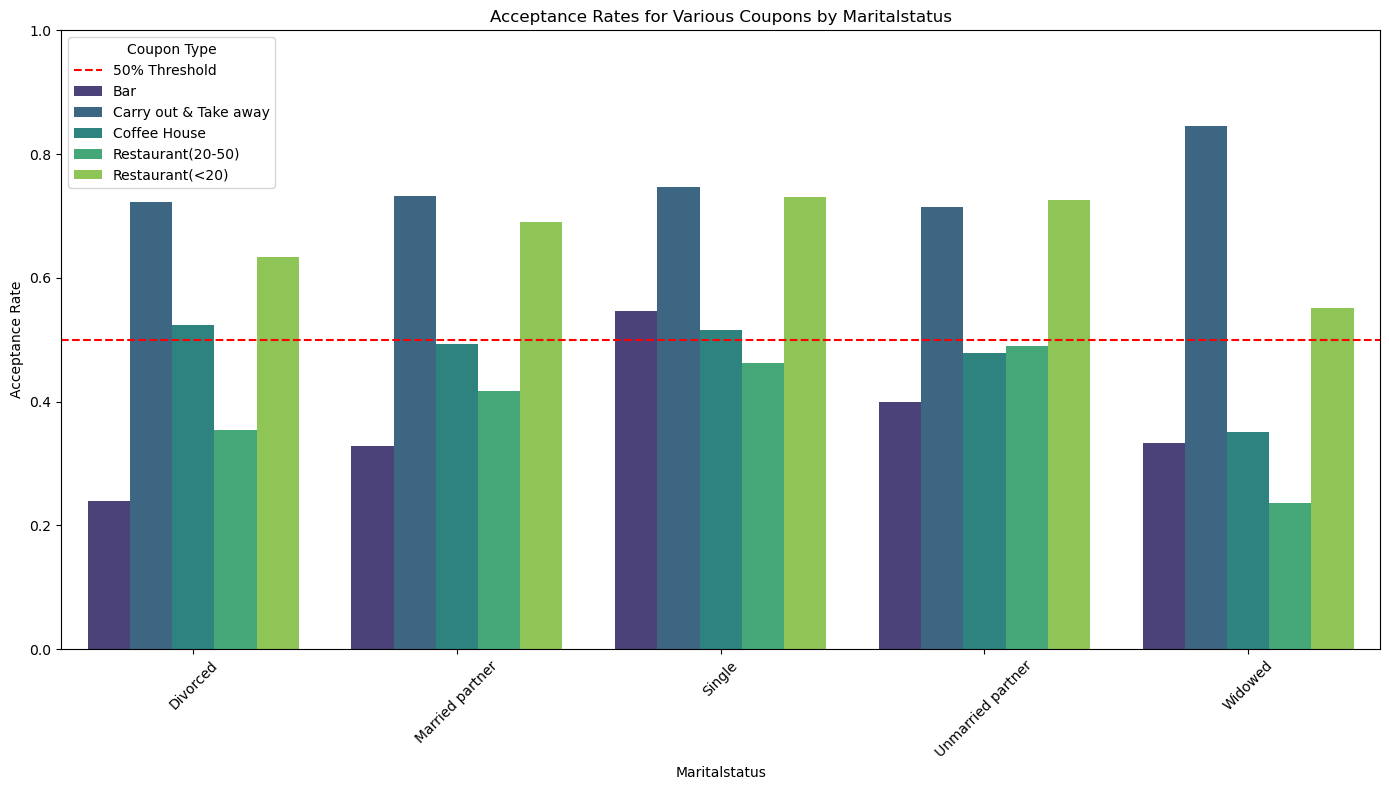

In [186]:
acceptance_rates_passenger = df_dropped.groupby(['coupon', 'passanger'])['Y'].mean().unstack()
acceptance_rates_income = df_dropped.groupby(['coupon', 'income'])['Y'].mean().unstack()
acceptance_rates_destination = df_dropped.groupby(['coupon', 'destination'])['Y'].mean().unstack()
acceptance_rates_marital_status = df_dropped.groupby(['coupon', 'maritalStatus'])['Y'].mean().unstack()

def plot_acceptance_rates(acceptance_rates, category_name):
    # Convert to DataFrame for better readability
    acceptance_rates_df = acceptance_rates.reset_index()
    # Melt the DataFrame for better visualization with seaborn
    acceptance_rates_melted = acceptance_rates_df.melt(id_vars='coupon', var_name=category_name, value_name='Acceptance Rate')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x=category_name, y='Acceptance Rate', hue='coupon', data=acceptance_rates_melted, palette="viridis")
    plt.title(f'Acceptance Rates for Various Coupons by {category_name.capitalize()}')
    plt.ylabel('Acceptance Rate')
    plt.xlabel(category_name.capitalize())
    plt.ylim(0, 1)
    plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
    plt.legend(title='Coupon Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot acceptance rates for each category
plot_acceptance_rates(acceptance_rates_passenger, 'passanger')
plot_acceptance_rates(acceptance_rates_income, 'income')
plot_acceptance_rates(acceptance_rates_destination, 'destination')
plot_acceptance_rates(acceptance_rates_marital_status, 'maritalStatus')

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


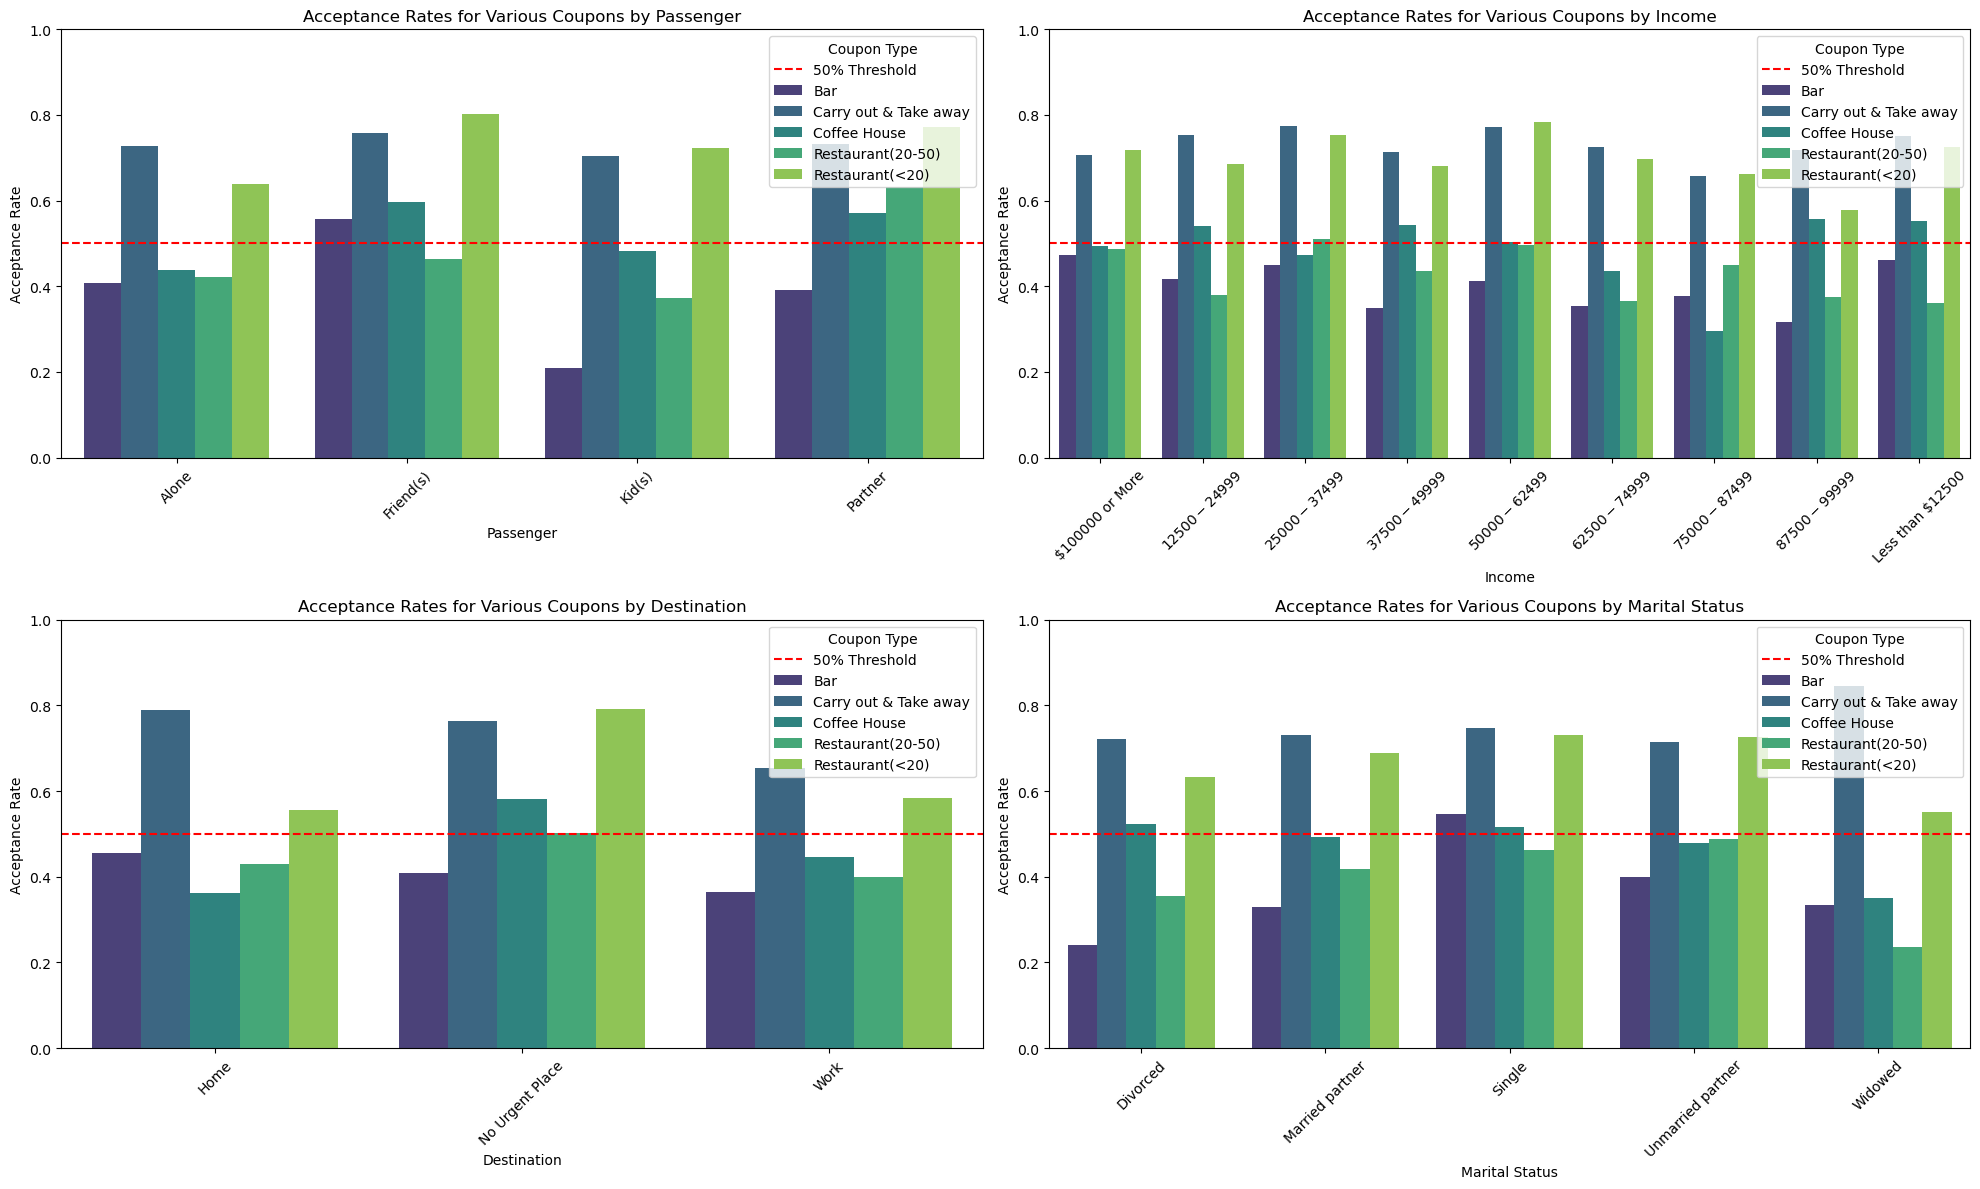

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure relevant columns exist
print(df_dropped.columns)

# Step 1: Calculate acceptance rates by coupon type and different categories
acceptance_rates_passenger = df_dropped.groupby(['coupon', 'passanger'])['Y'].mean().unstack()
acceptance_rates_income = df_dropped.groupby(['coupon', 'income'])['Y'].mean().unstack()
acceptance_rates_destination = df_dropped.groupby(['coupon', 'destination'])['Y'].mean().unstack()
acceptance_rates_marital_status = df_dropped.groupby(['coupon', 'maritalStatus'])['Y'].mean().unstack()

# Step 2: Plot acceptance rates for each category in one plot
def plot_combined_acceptance_rates():
    fig, axs = plt.subplots(2, 2, figsize=(20, 12))
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()
    
    # List of acceptance rates and corresponding labels
    acceptance_rates_list = [
        (acceptance_rates_passenger, 'Passenger'),
        (acceptance_rates_income, 'Income'),
        (acceptance_rates_destination, 'Destination'),
        (acceptance_rates_marital_status, 'Marital Status')
    ]
    
    for ax, (acceptance_rates, category_name) in zip(axs, acceptance_rates_list):
        # Convert to DataFrame for better readability
        acceptance_rates_df = acceptance_rates.reset_index()
        # Melt the DataFrame for better visualization with seaborn
        acceptance_rates_melted = acceptance_rates_df.melt(id_vars='coupon', var_name=category_name, value_name='Acceptance Rate')
        
        sns.barplot(x=category_name, y='Acceptance Rate', hue='coupon', data=acceptance_rates_melted, palette="viridis", ax=ax)
        ax.set_title(f'Acceptance Rates for Various Coupons by {category_name}')
        ax.set_ylabel('Acceptance Rate')
        ax.set_xlabel(category_name)
        ax.set_ylim(0, 1)
        ax.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
        ax.legend(title='Coupon Type')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Step 3: Plot combined acceptance rates
plot_combined_acceptance_rates()


In [ ]:
Problem: Coupon acceptance rates vary significantly based on factors such as passenger type, income levels, marital status, and destination type. Specifically, certain demographics are more inclined to accept specific coupon types, influencing targeted marketing strategies.
Hypothesis: Coupon Acceptance Rates by Various Factors

1. Coupon Type and Passenger:
* Hypothesis: Passenger Type influences the acceptance of specific coupon types, with passengers more likely to purchase coupons for "Restaurants <20" and "Carryout and Takeaway."
Coupon Type and Income:
* Hypothesis: Income levels influence the acceptance rates of different coupon types, with moderate-income individuals ($50k to $62k) more likely to accept "Restaurants <20" and "Carryout and Takeaway" coupons.
Coupon Type and Marital Status:
* Hypothesis: Marital status influences the acceptance of specific coupon types, with single, unmarried, divorced, and widowed individuals more likely to accept "Restaurants <20" and "Carryout and Takeaway" coupons.
Coupon Type and Destination:
* Hypothesis: Destination type influences the acceptance of specific coupon types, with those having "NoUrgent Place" as their destination more likely to accept "Restaurants <20" and "Carryout and Takeaway" coupons.


Final Summary
Findings:
1. Passenger Influence:
    * Passenger Type significantly affects coupon acceptance, with passengers being more inclined to purchase "Restaurants <20" and "Carryout and Takeaway" coupons, indicating social dynamics in decision-making.
2. Income Impact:
    * Income levels notably influence coupon acceptance rates. Moderate-income individuals (earning between $50k and $62k) demonstrate higher acceptance rates for "Restaurants <20" and "Carryout and Takeaway" coupons, highlighting economic factors in consumer behavior.
3. Marital Status Trends:
    * Marital status plays a crucial role, with single, unmarried, divorced, and widowed individuals more likely to accept "Restaurants <20" and "Carryout and Takeaway" coupons, suggesting lifestyle choices affect coupon decisions.
4. Destination Type:
    * The type of destination significantly influences coupon acceptance. Individuals traveling to "NoUrgent Place" are more likely to accept "Restaurants <20" and "Carryout and Takeaway" coupons, pointing to contextual factors affecting purchasing behavior.
Next Steps:
1. Further Analysis of Passenger Types:
    * Investigate specific passenger characteristics (e.g., age, relationship dynamics) to refine marketing strategies for targeted coupon offerings.
2. Income Segmentation:
    * Conduct a deeper analysis of the impact of income brackets beyond the $50k to $62k range to identify additional trends and insights across different income levels.
3. Marital Status Insights:
    * Explore potential correlations between marital status and other demographic factors (e.g., age, passenger type) to understand the nuances in coupon acceptance better.
4. Destination Behavior Patterns:
    * Analyze the reasons behind choosing "NoUrgent Place" as a destination and its correlation with coupon acceptance to develop tailored marketing strategies.
5. Experimental Validation:
    * Design and implement targeted experiments based on the findings, focusing on enhancing coupon acceptance rates among identified groups. Potential experiments may include:
        * Testing different coupon types among various passenger combinations.
        * Analyzing acceptance rates during specific times and destinations.
By following these next steps, insights can be further validated, leading to more effective marketing strategies and improved coupon acceptance rates across various customer segments.

